# Target Engineering

As per this repository's README file, the aim of this analysis is to consider the attributes of UK parliamentary constituencies, and discover which characteristics play the greatest role in determining which party people vote for.

Having created a dataframe of features, we need to make sure that we fully understand our target varaibles.


# 1) Import Libraries

We bring in the key libraries that we'll need to mung and explore the data.

In [1]:
#For the initial data exploration
import numpy as np
import pandas as pd
import math
import json

#For data visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib.font_manager
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from matplotlib.pylab import rcParams
from sklearn.preprocessing import MinMaxScaler

#Suppress warnings from showing
import warnings
warnings.filterwarnings('ignore')

#Allow ourselves to save things
import pickle

In [2]:
#Define colours for the visuals
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

CB91_BlueD = '#016794'
CB91_GreenD = '#187970'
CB91_PinkD = '#B317B1'
CB91_PurpleD = '#4E1762'
CB91_VioletD = '#330E4C'
CB91_AmberD = '#985E09'

CB91_BlueL = '#ABE5FF'
CB91_GreenL = '#B5F1EB'
CB91_PinkL = '#FAD9FA'
CB91_PurpleL = '#D9A8EB'
CB91_VioletL = '#ECD4F5'
CB91_AmberL = '#F9D094'


#The following gradients will be used for heatmaps, etc
CB91_Grad_BP = ['#2CBDFE', '#2fb9fc', '#33b4fa', '#36b0f8',
                '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',
                '#489bee', '#4b97ec', '#4f92ea', '#528ee8',
                '#568ae6', '#5986e4', '#5c81e2', '#607de0',
                '#6379de', '#6775dc', '#6a70da', '#6e6cd8',
                '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',
                '#7f57cf', '#8353cd', '#864ecb', '#894ac9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1',
                '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',
                '#a924b7', '#ac20b5', '#b01bb3', '#b317b1']

CB91_Grad_BA = ['#2cbdfe', '#31bdf9', '#36bcf5', '#3bbcf0',
                '#41bcec', '#46bbe7', '#4bbbe3', '#50bbde',
                '#55bbd9', '#5abad5', '#60bad0', '#65bacc',
                '#6ab9c7', '#6fb9c3', '#74b9be', '#79b8ba',
                '#7eb8b5', '#84b8b0', '#89b7ac', '#8eb7a7',
                '#93b7a3', '#98b79e', '#9db69a', '#a3b695',
                '#a8b690', '#adb58c', '#b2b587', '#b7b583',
                '#bcb47e', '#c1b47a', '#c7b475', '#ccb371',
                '#d1b36c', '#d6b367', '#dbb363', '#e0b25e',
                '#e6b25a', '#ebb255', '#f0b151', '#f5b14c']

CB91_Grad_AP = ['#f5b14c', '#f3ae4f', '#f0aa52', '#eea755',
                '#eca458', '#eaa05c', '#e79d5f', '#e59962',
                '#e39665', '#e19368', '#de8f6b', '#dc8c6e',
                '#da8971', '#d88574', '#d58277', '#d37f7b',
                '#d17b7e', '#cf7881', '#cc7584', '#ca7187',
                '#c86e8a', '#c66a8d', '#c36790', '#c16493',
                '#bf6096', '#bd5d9a', '#ba5a9d', '#b856a0',
                '#b653a3', '#b450a6', '#b14ca9', '#af49ac',
                '#ad46af', '#ab42b2', '#a83fb5', '#a63bb9',
                '#a438bc', '#a235bf', '#9f31c2', '#9d2ec5']

CB91_Grad_GP = ['#47dbcd', '#4bd9ce', '#50d8cf', '#54d6d0',
                '#59d5d1', '#5dd3d2', '#61d2d3', '#66d0d4',
                '#6acfd5', '#6fcdd6', '#73ccd6', '#78cad7',
                '#7cc9d8', '#80c7d9', '#85c6da', '#89c4db',
                '#8ec3dc', '#92c1dd', '#96c0de', '#9bbedf',
                '#9fbde0', '#a4bbe1', '#a8bae2', '#acb8e3',
                '#b1b7e4', '#b5b5e5', '#bab4e6', '#beb2e7',
                '#c2b1e8', '#c7afe9', '#cbaee9', '#d0acea',
                '#d4abeb', '#d9a9ec', '#dda8ed', '#e1a6ee',
                '#e6a5ef', '#eaa3f0', '#efa2f1', '#f3a0f2']

CB91_Grad_BWP= ['#2cbdfe','#31bffe','#37c0fe','#3cc2fe',
                '#42c4fe','#47c5fe','#4cc7fe','#52c9fe',
                '#57cbfe','#5dccfe','#62cefe','#68d0fe',
                '#6dd1fe','#72d3fe','#78d5fe','#7dd6fe',
                '#83d8fe','#88dafe','#8ddbfe','#93ddfe',
                '#98dfff','#9ee1ff','#a3e2ff','#a8e4ff',
                '#aee6ff','#b3e7ff','#b9e9ff','#beebff',
                '#c3ecff','#c9eeff','#cef0ff','#d4f1ff',
                '#d9f3ff','#dff5ff','#e4f7ff','#e9f8ff',
                '#effaff','#f4fcff','#fafdff','#ffffff',
                '#fdfafe','#fbf5fc','#f9f0fb','#f7eaf9',
                '#f4e5f8','#f2e0f7','#f0dbf5','#eed6f4',
                '#ecd1f2','#e9ccf1','#e7c7f0','#e5c1ee',
                '#e2bced','#e0b7eb','#deb2ea','#dbade8',
                '#d9a8e7','#d6a3e5','#d49ee4','#d199e2',
                '#cf94e1','#cc8fdf','#ca89de','#c784dc',
                '#c57fdb','#c27ad9','#bf75d8','#bd6fd6',
                '#ba6ad5','#b765d3','#b45fd2','#b25ad0',
                '#af54cf','#ac4ecd','#a949cb','#a642ca',
                '#a33cc8','#a035c7','#9d2ec5']

#Add party colors
con_blue = '#0A3B7C'
lab_red = '#E4003B'
lib_yel = '#FAA61A'
snp_yel = '#FFF481'
green_green = '#52DF00'
brex_blue = '#00E2ED'
ukip_pur = '#470A65'
plaid_green = '#006A56'

con_lab = '#992281'
con_lib = '#837859'
con_snp = '#85987f'
lab_lib = '#ef532b'
lab_snp = '#f27a5e'
lib_snp = '#fccf4d'


#A list that we'll use to cycle through colors in charts
color_list = [CB91_Blue, CB91_Green, CB91_Amber, CB91_Pink,
              CB91_Violet, CB91_BlueD, CB91_GreenD, CB91_Purple,
              CB91_BlueL, CB91_VioletD, CB91_GreenL, CB91_AmberL,
              CB91_AmberD, CB91_PinkL, CB91_VioletL, CB91_PinkD]


#Use seaborn to set all the default chart visual settings
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":16})

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

Then bring in the mapping functionality from the previous workbook.

In [3]:
df = pd.read_csv('Datasets/data.csv')
df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
df = df.set_index('ID', drop=True)

In [4]:
def gradient_mapper(kpi, grad, outliers=None, stretch=1, factor=1):
    
    '''
    Takes a list/series of numbers, outputs a list of hex colours,
    appropriate for heatmapping the initial data.
    
    Parameters:
    - col (list/series, etc.): The data to be transformed
    - grad (list hex codes): A list of colors that the data will be transformed to
    - outliers (top,bottom,both): Stretches the outliers, resulting in more gradient
                                  change amongst clustered values
    - stretch (int): The number of colors to duplicate if outliers variable used
    - factor (int): The scale of color duplication if outliers variable used
    
    '''
    #Work out how many colours we have in the given gradient
    colors = len(grad)
    half = colors // 2
    
    #Ensure that stretch is possible
    stretch = min(half//3, stretch)
    
    factors = [4*factor, 3*factor, 2*factor]
    
    if outliers != None:
        #Stretch gradient if required. Declare three lists:
        #Start is the stretch map for the bottom end
        if (outliers.lower() == 'bottom') or (outliers.lower() == 'both'):
            start = [factors[0]]*stretch + [factors[1]]*stretch + [factors[2]]*stretch
        else:
            start = []

        #End is the stretch map for the top end
        if (outliers.lower() == 'top') or (outliers.lower() == 'both'):
            end = [factors[2]]*stretch + [factors[1]]*stretch + [factors[0]]*stretch
        else:
            end = []

        #Middle is a list of 1s which will be non-transformed
        middle = [1 for i in range(colors - len(start) - len(end))]

        stretch_map = start + middle + end
        
    else:
        stretch_map = [1 for i in range(colors)]
        
    #Create tuples of the gradients, and the number of
    #times they should be repeated in the list
    zip_list = list(zip(grad,stretch_map))
    
    #Use this to create a list of lists
    #Each element will be a list of the same gradient
    #repeated the required number of times
    list_of_lists = [[i[0]]*i[1] for i in zip_list]
    
    #Melt this list of lists into a single list
    grad = sum(list_of_lists, [])
    
    #Re-define colors variable
    colors = len(grad)-1
    
    #Define the lowest and the highest points in the dataset
    kpi_min = kpi.min()
    kpi_max = kpi.max()
    
    #Transform the data to integers between zero and the length of the gradient list
    first_map = list(map(lambda x: int(round(colors*(x-kpi_min) /
                                             (kpi_max-kpi_min),0)), list(kpi)))
    
    #Map the integers onto the gradient list
    second_map = list(map(lambda x: grad[x], first_map))
    
    #Return this, as well as the new gradient
    return second_map, grad




f = open('Datasets/constituencies.hexjson')
datamap = json.load(f)
datamap = pd.DataFrame(datamap['hexes']).T
datamap = datamap[['n','q','r']]
datamap.columns=['Name','X','Y']

def kpi_map(kpi, width=6, colorbar=True,
            outliers=None, stretch=1, factor=1,
            exclude=[], title=None,
            colors=None, exc_color='#999999',
            grad=CB91_Grad_AP, data=df):
    
    '''
    Outputs a choropleth map, showing each constituency in the same size.
    
    Parameters:
    - kpi (list/series, etc.): The data to be transformed
    - width (float): The desired width of the figure
    - df (dataframe): The dataframe to get the data from
    - grad (list hex codes): A list of colors that the data will be transformed to
    - outliers (top,bottom,both): Stretches the outliers, resulting in more gradient
                                  change amongst clustered values
    - stretch (int): The number of colors to duplicate if outliers variable used
    - factor (int): The scale of color duplication if outliers variable used
    - exclude (list): A list of regions to exclude from the chart
    - colors (dataframe): A dataframe of hex-codes (index should be constituency codes)
    - title (string): The desired title of the chart
    
    '''    
    
    #Filter out different regions, depending on paramaters
    df_filtered = pd.concat([datamap, data[['Region',kpi]]], axis=1)
    
    #If we have colors to add, concatonate these in
    if isinstance(colors, pd.DataFrame):
        df_filtered = pd.concat([df_filtered, colors], axis=1)
        df_filtered.columns = ['Name', 'X', 'Y', 'Region', kpi, 'Colors']
    
    df_filtered = df_filtered.loc[~df_filtered['Region'].isin(exclude)]
    kpi_filtered = df_filtered[kpi]
    
    if isinstance(colors, pd.DataFrame) is False:
        #Use the gradient mapper function to return the colors for the plot
        gradient_map = gradient_mapper(kpi=kpi_filtered,
                                    grad=grad,
                                    outliers=outliers,
                                    stretch=stretch,
                                    factor=factor)
        colors_map = gradient_map[0]
    
    else:
        #Fill in nan colors with white
        df_filtered['Colors'].fillna(exc_color, inplace=True)
        
        #Return the column to be used as the colours list in the plot
        colors_map = list(df_filtered['Colors'])
    
    #Work out the aspect ratio of the filtered constituencies
    X_diff = np.max(df_filtered['X'])-np.min(df_filtered['X'])
    Y_diff = np.max(df_filtered['Y'])-np.min(df_filtered['Y'])
    
    #Declare the width and height of the plot
    height = width * (Y_diff/X_diff)
    size = 500*math.pi*((width/X_diff)**2)
    
    #Create the figure
    fig, ax = plt.subplots(figsize=(width,height))
    
    plt.xticks([])
    plt.yticks([])

    #Plot the scatter
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(df_filtered['X'],
                df_filtered['Y'],
                s=size,
                marker='s',
                c=colors_map)
    
    #Remove axes
    sns.despine(left=True, bottom=True)
    ax1.set_title(title);
    
    #plot the colorbar
    if (colorbar == True) and isinstance(colors, pd.DataFrame) is False:        
        cmap = LinearSegmentedColormap.from_list(name= '',
                                                 colors=gradient_map[1])
        ax2 = fig.add_subplot(2,30,28)
        norm = mpl.colors.Normalize(vmin=df_filtered[kpi].min(),
                                    vmax=df_filtered[kpi].max())
        cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                       norm=norm, orientation='vertical')
    
        # remove the x and y ticks
        for ax in [ax1,ax2]:
            ax.set_xticks([])
            ax.set_yticks([])
    
    else:
        ax1.set_xticks([])
        ax1.set_yticks([])

# 2) The 2016 EU Referendum

So far, we have left the referendum result out of the scope of the features.

One could argue that it could itself be used as a target (or at least a function of the other functions that we have gathered so far), though certainly for general elections since, Brexit has become a big enough issue to justify it as a feature in and of itself.

In [5]:
df_eu = pd.read_csv('CSVs/Referendum.csv')

#Rename columns
df_eu.rename(columns={'ONS ID':'ID',
                      'Constituency':'Name',
                      'TO USE':'%LeaveVote'}, inplace=True)

#Set the index to ID and bring in region data
df_eu.set_index('ID',inplace=True, drop=True)
df_eu = pd.concat([df[['Region']], df_eu], axis=1)

#Keep columnns we need
df_eu = df_eu[['Name','Region','%LeaveVote']]
df_eu.dropna(inplace=True)

#Make leave vote data numerical
def pc_to_float(X):
    X = float(X[:-1])
    return X / 100

df_eu['%LeaveVote'] = df_eu['%LeaveVote'].map(lambda x: pc_to_float(x))

df_eu.head()

Name         Region  %LeaveVote
E14000530                 Aldershot     South East       0.579
E14000531       Aldridge-Brownhills  West Midlands       0.678
E14000532  Altrincham and Sale West     North West       0.386
E14000533              Amber Valley  East Midlands       0.653
E14000534   Arundel and South Downs     South East       0.497

Let's make some visualisations. For example, how did the leave vote vary by constituency?

In [6]:
df_eu['%LeaveVote'].max()

0.7559999999999999

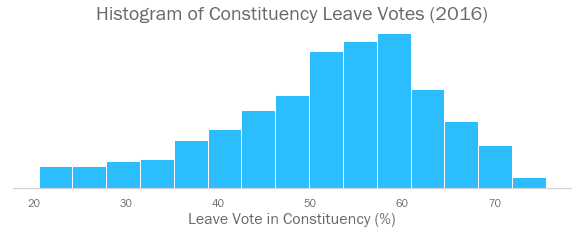

In [7]:
plt.figure(figsize=(10,3))
plt.hist(df_eu['%LeaveVote']*100, bins=15, density=True)
plt.title('Histogram of Constituency Leave Votes (2016)')
plt.xlabel('Leave Vote in Constituency (%)')
plt.xlim()
plt.yticks([])
sns.despine(left=True)

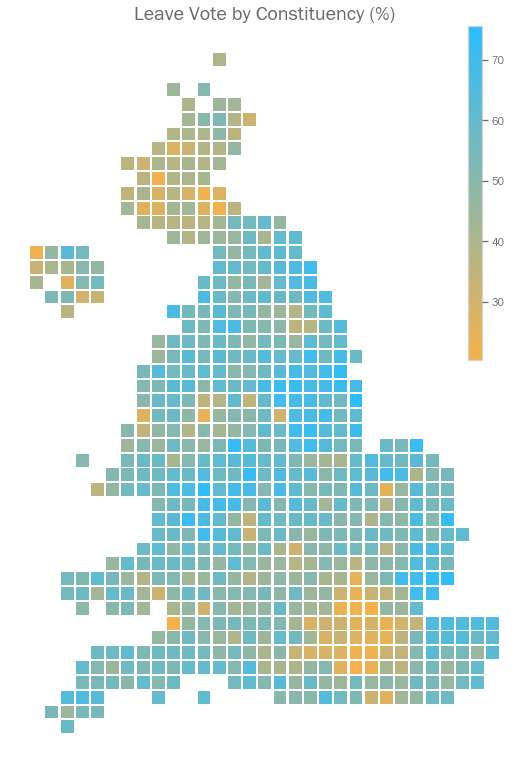

In [8]:
kpi_map('%LeaveVote', data=df_eu*100,
        grad=CB91_Grad_BA[::-1],
        title='Leave Vote by Constituency (%)',
       width=9)

So the leave vote (which we know was 52% nationally) was actually very different on a constituency by constituency basis - between 20% and 80%.

Let's join the referendum results to the main dataframe.

In [9]:
df = pd.concat([df,df_eu[['%LeaveVote']]], axis=1)
df.columns

Index(['Name', 'Region', 'Type', 'Population', '%0-9YO', '%10-19YO',
       '%20-29YO', '%30-39YO', '%40-49YO', '%50-59YO', '%60-69YO', '%70-79YO',
       '%80+YO', 'AreaKM2', 'PopDensity', 'Businesses', '%BusinessGrowth',
       'BusinessesPer1kCap', '%Unemployment', 'UnemploymentChange', '2019Wage',
       'HousePrice', '%HousePriceGrowth', 'HousePricePerWage', '%OwnOutright',
       '%OwnWithMort', '%PrivateRent', '%SocialHousing',
       '%Heavy Industry & Manufacturing', '%Wholesale & Retail',
       '%Agriculture', '%Hospitality', '%Public Admin & Defence', '%Transport',
       '%Health & Social Work', '%Support & Admin', '%Education', '%Sciences',
       '%FS & ICT', '%Other Industry', '%NoQuals', '%Level1', '%Level2',
       '%Level3', '%Level4+', '%White', '%Mixed', '%Asian', '%Black',
       '%NoReligion', '%Christian', '%Muslim', '%Buddhist', '%Hindu',
       '%Jewish', '%Sikh', '%BornUK', '%BornIreland', '%BornOtherEU',
       '%BornOtherEurope', '%BornAfrica', '%BornME', '

How does a constituency's Leave vote correlate with other features that we have considered so far?

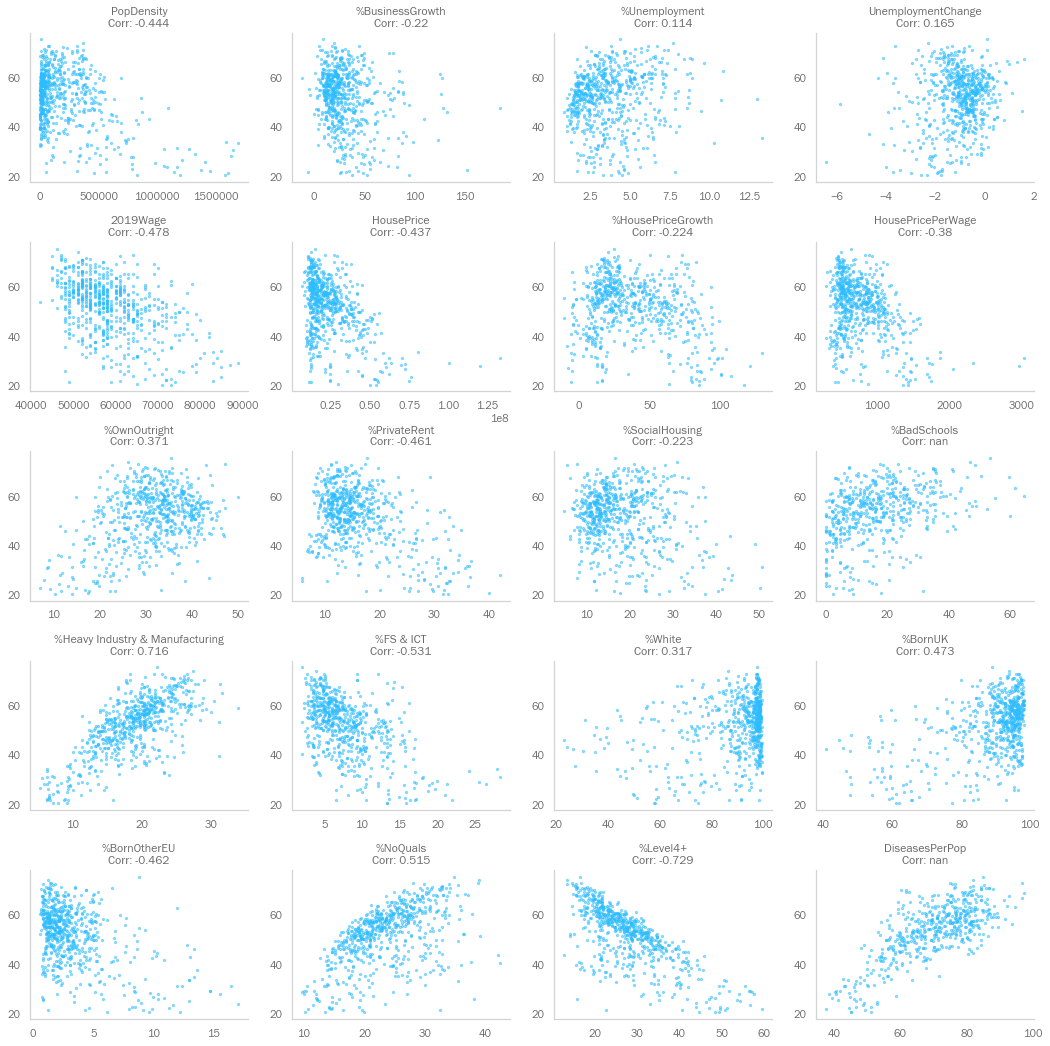

In [10]:
select_kpis = ['PopDensity','%BusinessGrowth','%Unemployment',
              'UnemploymentChange','2019Wage','HousePrice','%HousePriceGrowth',
              'HousePricePerWage','%OwnOutright','%PrivateRent','%SocialHousing',
              '%BadSchools','%Heavy Industry & Manufacturing','%FS & ICT',
              '%White','%BornUK','%BornOtherEU','%NoQuals','%Level4+','DiseasesPerPop']

c = select_kpis
l = len(c)
n = 4

fig, axes = plt.subplots(ncols = n, nrows = l // n + 1, figsize = (18,22))

fig.subplots_adjust(hspace=0.4)

for a in range(l):
    ax = axes[a//n][a%n]
    ax.scatter(df[c[a]] * 100,
               df['%LeaveVote'] * 100,
               alpha = 0.5, s=5)  #change second argument to dependent variable
    corr = round(np.corrcoef(df[c[a]],df['%LeaveVote'])[0][1],3)
    ax.set_title(f'{c[a]}\nCorr: {corr}', fontsize=12)

spare = n * (l // n + 1) - l

for b in range(spare):
    fig.delaxes(axes[l // n][n - 1 - b])

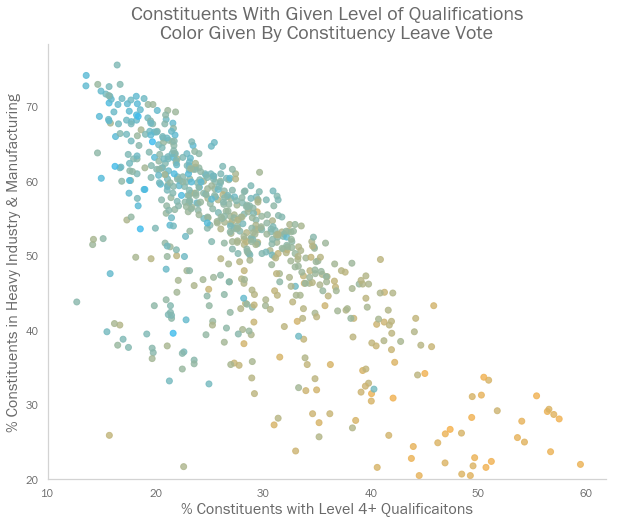

In [11]:
X = df['%Level4+'] * 100
Y = df['%LeaveVote'] * 100
C = gradient_mapper(kpi=df['%Heavy Industry & Manufacturing'],
                    grad=CB91_Grad_BA[::-1])[0]

plt.figure(figsize=(10,8))
plt.scatter(X,Y,alpha=0.8,color=C)

plt.ylim(20)
plt.xlim(10)

plt.title('Constituents With Given Level of Qualifications\
\nColor Given By Constituency Leave Vote')
plt.xlabel('% Constituents with Level 4+ Qualificaitons')
plt.ylabel('% Constituents in Heavy Industry & Manufacturing');

The strongest single correlation seems to be education level (i.e. a constituency with a better educated electorate tended to vote remain). The share of people working in heavy industry and manufacturing also correlated highly with the leave vote.

# 3) Targets - General Election Results

The ultimate aim of this analysis was to associate constituency characteristics with how thhose constituencies voted in general elections.

As I type this, we are two weeks away from the 2019 general election. Thus, the most recent *concrete* election results we actually have are from 2017. There are some limitations to using this as our target variable - namely the fact that politics has moved on quite a bit since then - we have a new Prime Minister for one thing.

The other potential target that may more accurately reflect 2019's political landscape is a large-scale poll run by YouGov (which sampled over 100,000 people nationwide), which gives a projected vote share on a constituency by constituency basis. The data for this poll can be found on their website: https://yougov.co.uk/topics/politics/articles-reports/2019/11/27/yougov-mrp-conservatives-359-labour-211-snp-43-ld-

### The nature of the target

If we were feeling ambitious, we might want to try and predict the vote share for each party in the election. However, the vote shares on a constituency-by-constituency basis can be volatile, and be driven by many other exogonous factors that we aren't able to consider.

We may also wish to simply say that one seat is 'Labour', or 'Conservative', based on who won in that constituency. The risk here is that we potentially over-simplify. For example, in 2017, Labour won the seat of Knowsley in Liverpool with a majority of over 42,000 votes, whereas they won Kensington with a majority of just 20 votes. Thus, we need some way to distinguish between 'safe' seats and 'marginal' ones.

Firstly, let's look at our election data.

In [12]:
df_17 = pd.read_csv('CSVs/Election2017.csv')

df_17.rename(columns={'ons_id':'ID',
                     'constituency_name':'Name',
                     'region_name':'Region',
                     'first_party':'Winner_17'},
             inplace=True)

df_17.set_index('ID', drop=True, inplace=True)

df_17.head(3)

ons_region_id            Name    Region    result Winner_17  \
ID                                                                      
W07000049     W92000004        Aberavon     Wales  Lab hold       Lab   
W07000058     W92000004       Aberconwy     Wales  Con hold       Con   
S14000001     S92000003  Aberdeen North  Scotland  SNP hold       SNP   

          second_party  electorate  valid_votes  invalid_votes  majority  ...  \
ID                                                                        ...   
W07000049          Con       49892        33268             57     16761  ...   
W07000058          Lab       45251        32150             78       635  ...   
S14000001          Lab       62130        36757             55      4139  ...   

           green    snp    pc  dup  sf  sdlp  uup  alliance  other  \
ID                                                                   
W07000049      0      0  2761    0   0     0    0         0      0   
W07000058      0      0  3170    0   0     0    0         0      0   
S14000001      0  15170     0    0   0     0    0         0    522   

           other_winner  
ID                       
W07000049             0  
W07000058             0  
S14000001             0  

[3 rows x 24 columns]

Given that we know constituency sizes are different, we should put votes into percentage, rather than absolute terms.

In [13]:
#Declare a list of parties
parties = ['con', 'lab', 'ld',
           'ukip', 'green', 'snp',
           'pc', 'dup','sf', 'sdlp',
           'uup', 'alliance']

#Iterate through parties, updating their columns with vote share
#Exclude 'other' parties in this analysis
for i in parties:
    df_17[i] = df_17[i] / (df_17['valid_votes'] - df_17['other'])
    
#We can also work out turnout by constituency, as a proxy for political engagement
df_17['%17Turnout'] = (df_17['valid_votes'] + df_17['invalid_votes']) / df_17['electorate']

Let's work out whether each seat was a 'safe' victory for a given party, or whether it was a close 'marginal' seat.

In [14]:
def seat_type(X, thresh=0.15, data=df_17,
              parties=['con', 'lab', 'ld',
                       'ukip', 'green', 'snp',
                       'pc', 'dup','sf', 'sdlp',
                       'uup', 'alliance']):
    
    '''
    Takes a parliamentary seat ID, and outputs what type of seat it is.
    
    Threshold determines the minimum gap required for seat to be 'safe'
    
    '''
    #Create a 'dataframe' of the two parties with highest share in seat
    df_temp = data.loc[[X],parties].T.sort_values(X,ascending=False).iloc[:2,:]
    
    #Define the winning margin
    margin = df_temp[X][0] - df_temp[X][1]
    
    #If margin greater than threshold seat is safe
    if margin > thresh:
        party = df_temp.index[0]
        return f'{party} safe'.lower()
    
    #Else, seat is marginal
    else:
        #Return parties in alphabetical order
        #This means that a lab-con marginal will be treated the
        #same as a con-lab marginal in the final analysis
        top_two = sorted(df_temp.index)
        return f'{top_two[0]} {top_two[1]} marginal'.lower()

In [15]:
#Create a new column based on this data
df_17['seat_types_17'] = [seat_type(x) for x in df_17.index]

Let's visualise how the seats break down in England and Wales.

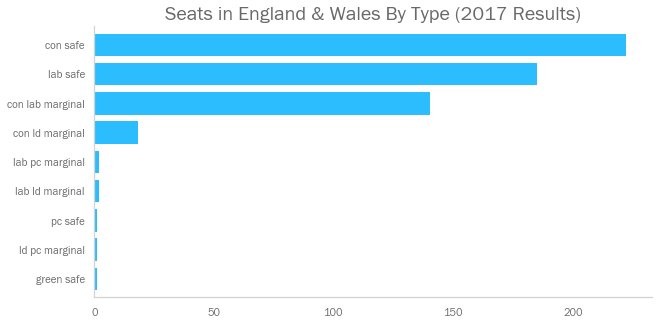

In [16]:
df_17.loc[(df_17['Region']!='Scotland')
          & (df_17['Region']!='Northern Ireland')
          & (df_17['Name']!='Buckingham')].groupby(
    'seat_types_17').count().sort_values('Name')['Name'].plot.barh(width=0.8,
                                       figsize=(10,5))

plt.title('Seats in England & Wales By Type (2017 Results)')
plt.ylabel('');

So the vast majority of seats in England and Wales were safe seats in 2017.

Let's have a look at Scotland...

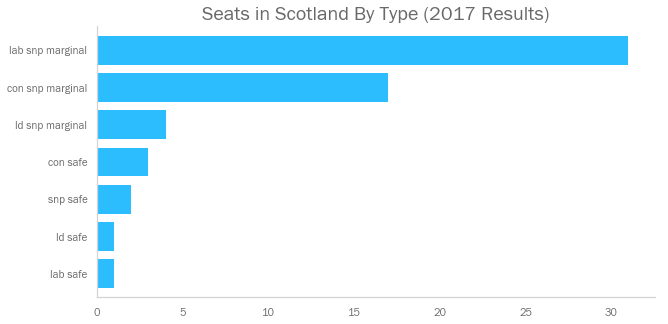

In [17]:
df_17.loc[df_17['Region']=='Scotland'].groupby(
    'seat_types_17').count().sort_values('Name')['Name'].plot.barh(width=0.8,
                                       figsize=(10,5))

plt.title('Seats in Scotland By Type (2017 Results)')
plt.ylabel('');

So many of the seats had marginal results in Scotland. It just happened that the SNP was on the right side of the margins most of the time!

Let's add the seat types to our dataframe.

In [18]:
df = pd.concat([df, df_17[['%17Turnout','Winner_17','seat_types_17']]], axis=1)

### YouGov Predictions

As per our earlier commentary, politics has changed a lot since the 2017 election. It would be nice to see if we can use YouGov's seat-by-seat polling as a proxy for the 2019 result.

In [19]:
df_yg = pd.read_csv('CSVs/YouGov.csv')

#Rename columns
df_yg.columns = [i.lower() for i in list(df_yg.columns)]

df_yg.rename(columns={'code':'ID',
                      'constituency':'Name'}, inplace=True)

#Set index and drop columns as required
df_yg.set_index('ID', inplace=True, drop=True)
df_yg.drop(['i','unnamed: 0'], inplace=True, axis=1)

#Get decimal numbers instead of percent
df_yg.iloc[:,1:] = df_yg.iloc[:,1:]/100

#Calculate the share excluding 'other'
for i in list(df_yg.columns[1:]):
    df_yg[i] = df_yg[i] / (1-df_yg['other'])
    
#Drop 'other column'
df_yg = df_yg.iloc[:,:-1]

df_yg = pd.concat([df_yg, df[['Region']]], axis=1, join='inner')

Use our function from before to predict what kind of seat each constituency will be, then visualise.

In [20]:
df_yg['seat_types_yg'] = [seat_type(x, data=df_yg) for x in df_yg.index]

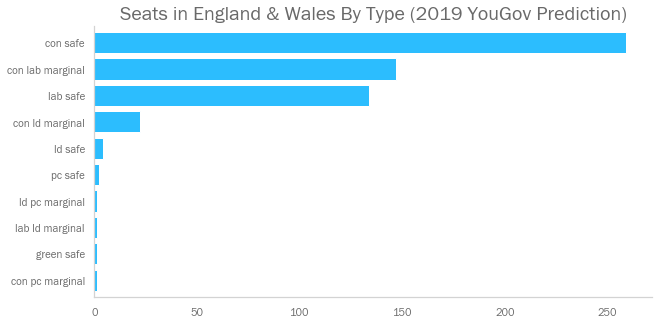

In [21]:
df_yg.loc[(df_yg['Region']!='Scotland')
          & (df_yg['Name']!='Chorley')].groupby(
    'seat_types_yg').count().sort_values('Name')['Name'].plot.barh(width=0.8,
                                       figsize=(10,5))

plt.title('Seats in England & Wales By Type (2019 YouGov Prediction)')
plt.ylabel('');

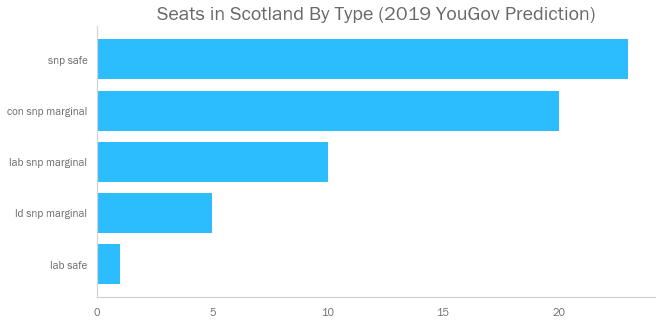

In [22]:
df_yg.loc[df_yg['Region']=='Scotland'].groupby(
    'seat_types_yg').count().sort_values('Name')['Name'].plot.barh(width=0.8,
                                       figsize=(10,5))

plt.title('Seats in Scotland By Type (2019 YouGov Prediction)')
plt.ylabel('');

Let's add these predictions to the main dataframe.

In [23]:
df = pd.concat([df, df_yg[['seat_types_yg']]], axis=1)

#Save the dataframe down
df.to_csv('Datasets/data_with_targets.csv')

We can visualise the changes from  using a Sankey diagram in Plotly.

In [ ]:
seat_change = df.loc[(df['Region']!='Northern Ireland')
                   & (df['Name']!='Buckingham')
                   & (df['Name']!='Chorley'),
                     ['Name','seat_types_17','seat_types_yg']]

seat_change_table = seat_change.groupby(['seat_types_17', 'seat_types_yg']).count()
seat_change_table.reset_index(inplace=True)


labels_17 = list(df.loc[(df['Region']!='Northern Ireland')
    & (df['Name']!='Buckingham')
    & (df['Name']!='Chorley')].groupby(
    'seat_types_17').count()['Name'].sort_values(ascending=False).index)

labels_yg = list(df.loc[(df['Region']!='Northern Ireland')
    & (df['Name']!='Buckingham')
    & (df['Name']!='Chorley')].groupby(
    'seat_types_yg').count()['Name'].sort_values(ascending=False).index)


seat_change_table['Source'] = seat_change_table['seat_types_17'].map(
    lambda x: labels_17.index(x))

seat_change_table['Target'] = seat_change_table['seat_types_yg'].map(
    lambda x: labels_yg.index(x) + len(labels_17))

In [ ]:
sankey_colors = [con_blue,lab_red,con_lab,lab_snp,
     con_lib,con_snp,lib_snp,snp_yel,'grey',lab_lib,
     plaid_green,lib_yel,'grey',green_green,
     con_blue,con_lab,lab_red,snp_yel,con_lib,
     con_snp,lab_snp,lib_snp,lib_yel,plaid_green,
     'grey',lab_lib,green_green,'grey']


import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 10,
      thickness = 50,
      label = labels_17 + labels_yg,
      color = sankey_colors
    ),
    link = dict(
      source = list(seat_change_table['Source']),
      target = list(seat_change_table['Target']),
      value = list(seat_change_table['Name'])
  ),
)])

fig.update_layout(title_text="Parliamentary Seats By Type: 2017 Election Results to 2019 YouGov Predictions",
                  font_size=10,
                  width=900,
                  height=900)
fig.show()

## Further EDA

Given we now have target values, we can start considering how the different KPIs vary across seats of different types - for example, are Labour more popular in seats with more immigrants?

Clearly, there are many different things we could check. Let's get an overview using a heatmap.

In [ ]:
def heatmap_kpis(kpis,
                 title='KPI Heatmap by Constituency Type\n',
                 exclude=['green safe'],
                 scope='eng',
                 agg='mean',
                 size=0.4,
                 cmap=CB91_Grad_BWP,
                 target='seat_types_yg',
                 data=df):
    
    '''
    Heatmap the table produced by the cluster_kpis function
    '''
    data = data.loc[~data[target].isin(exclude)]
    
    #Calculate the required table and transpose
    if scope == 'eng':
        df_temp = data.loc[(df['Region']!='Wales')
                          &(df['Region']!='Scotland')
                          &(df['Region']!='Northern Ireland')]
        
        df_temp = df_temp[kpis+['seat_types_yg']].groupby('seat_types_yg')

        
    else:
        df_temp = data[kpis+['seat_types_yg']].groupby('seat_types_yg')
    
    if agg == 'mean':
        df_temp = df_temp.mean()
        
    elif agg == 'median':
        df_temp = df_temp.median()
        
    else:
        return None
    
    #For each kpi, scale as required
    scaler = MinMaxScaler()
    scaler.fit(df_temp)
    df_scale = scaler.transform(df_temp)
    
    df_scale = pd.DataFrame(df_scale,
                            columns=df_temp.columns,
                            index=df_temp.index)
    
    height = size*len(df_scale.index)
    width = 1.1*size*len(df_scale.columns)
    
    plt.figure(figsize=(width,height))
    sns.heatmap(df_scale,cbar=True,cmap=cmap)
    plt.yticks(rotation='horizontal')
    plt.title(title)
    

    
#Define a standard list of KPIs to look at
kpis_gb=['PopDensity', '2019Wage', 'HousePricePerWage', '%HousePriceGrowth',
      '%OwnOutright','%OwnWithMort', '%PrivateRent',
      '%SocialHousing','%Unemployment', 'UnemploymentChange',
      '%Heavy Industry & Manufacturing', '%Wholesale & Retail',
      '%FS & ICT', '%White', '%Muslim', '%BornUK', '%BornOtherEU',
      '%Level4+', '%LeaveVote']

kpis_eng=['PopDensity',
          '2019Wage', 'HousePricePerWage', '%HousePriceGrowth',
          '%OwnOutright','%OwnWithMort', '%PrivateRent',
          '%SocialHousing','%Unemployment', 'UnemploymentChange',
          '%Heavy Industry & Manufacturing', '%Wholesale & Retail',
          '%FS & ICT', '%White', '%BornUK', '%BornOtherEU', '%Muslim',
          '%Level4+', '%ChildcareGood', 'LASpendGrowth15to19',
          'DiseasesPerPop', 'Depression','%17Turnout','%LeaveVote']

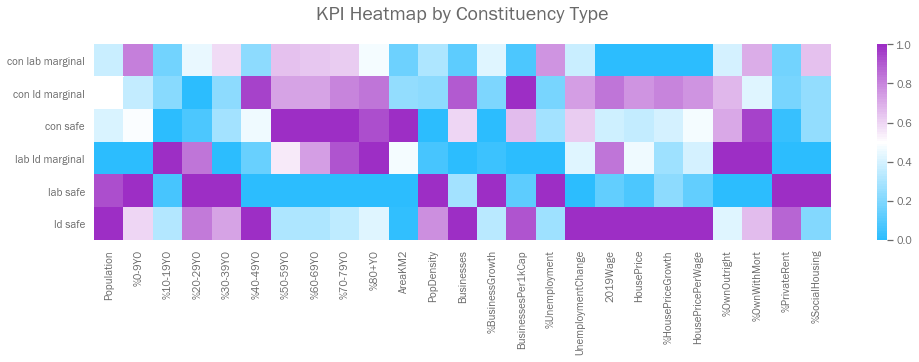

In [ ]:
heatmap_kpis(kpis=list(df.columns[3:28]), size=0.6, agg='median')
plt.ylabel('');

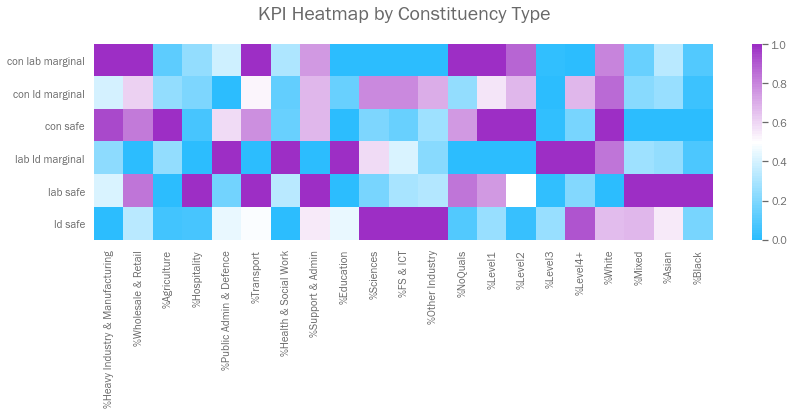

In [ ]:
heatmap_kpis(kpis=list(df.columns[28:49]), size=0.6, agg='median')
plt.ylabel('');

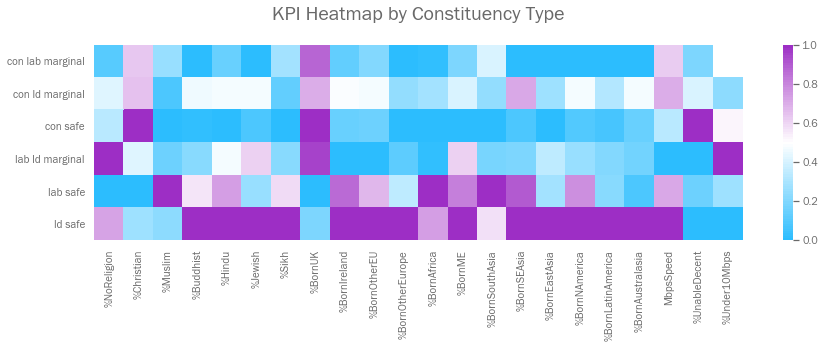

In [ ]:
heatmap_kpis(kpis=list(df.columns[49:71]), size=0.6, agg='median')
plt.ylabel('');

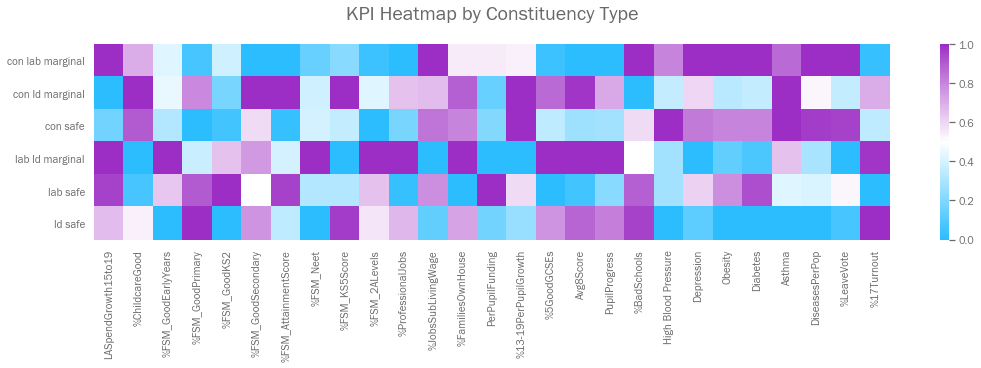

In [ ]:
heatmap_kpis(kpis=list(df.columns[71:-3]), size=0.6, agg='median')
plt.ylabel('');

In [ ]:
seat_type_pivot = df.pivot_table(index='seat_types_yg',
                                 columns='Type',
                                 aggfunc='count').iloc[:,:5].fillna(0)

lab_con_seats = ['con safe', 'con lab marginal', 'lab safe']
types = ['Large Town', 'Small Town', 'Rural', 'Small City', 'Large City']
seat_type_pivot=seat_type_pivot.loc[lab_con_seats]['%0-9YO']
seat_type_pivot = seat_type_pivot[types]
seat_type_pivot = seat_type_pivot.div(seat_type_pivot.sum(1),axis=0)

(100* seat_type_pivot.iloc[:,:2]).plot.barh(stacked=True,
                          width=0.8,
                          figsize=(9,5))

plt.legend(bbox_to_anchor=(0.7, -0.1),
           ncol=2,
           frameon=False)

plt.ylabel('')
plt.title('Share of Seats In Towns by Type');